In [172]:
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt


#Load the data file into a Pandas Dataframe
symptom_data = pd.read_csv("root_cause_analysis.csv")

#Explore the data loaded
print(symptom_data.dtypes)
print(symptom_data.shape)
symptom_data.head()

ID              int64
CPU_LOAD        int64
MEMORY_LOAD     int64
DELAY           int64
ERROR_1000      int64
ERROR_1001      int64
ERROR_1002      int64
ERROR_1003      int64
ROOT_CAUSE     object
dtype: object
(1000, 9)


,ID,CPU_LOAD,MEMORY_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY
1,2,0,0,0,0,0,0,1,MEMORY
2,3,0,1,1,0,0,1,1,MEMORY
3,4,0,1,0,1,1,0,1,MEMORY
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [173]:
# print value counts
for column in symptom_data.columns:
    if column != 'ID':
        print(symptom_data[column].value_counts())

0    528
1    472
Name: CPU_LOAD, dtype: int64
0    582
1    418
Name: MEMORY_LOAD, dtype: int64
0    606
1    394
Name: DELAY, dtype: int64
0    605
1    395
Name: ERROR_1000, dtype: int64
0    515
1    485
Name: ERROR_1001, dtype: int64
0    568
1    432
Name: ERROR_1002, dtype: int64
0    619
1    381
Name: ERROR_1003, dtype: int64
DATABASE_ISSUE    340
NETWORK_DELAY     337
MEMORY            323
Name: ROOT_CAUSE, dtype: int64


In [174]:
# lebel encoding and tran test splitiing
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
symptom_data['ROOT_CAUSE'] = label_encoder.fit_transform(
                                symptom_data['ROOT_CAUSE'])

np_symptom = symptom_data.to_numpy().astype(float)

X_train = np_symptom[:,1:8]
Y_train=np_symptom[:,8]
Y_train = tf.keras.utils.to_categorical(Y_train,3)

print("Shape of feature variables :", X_train.shape)
print("Shape of target variable :",Y_train.shape)

Shape of feature variables : (1000, 7)
Shape of target variable : (1000, 3)


In [175]:
label_encoder.get_params

<bound method BaseEstimator.get_params of LabelEncoder()>

In [176]:
Y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [177]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#Setup Training Parameters
EPOCHS=50
BATCH_SIZE=100
VERBOSE=1
OUTPUT_CLASSES=len(label_encoder.classes_)
N_HIDDEN=64
VALIDATION_SPLIT=0.2

#Create a Keras sequential model
model = tf.keras.models.Sequential()
#Add a Dense Layer
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(7,),
                              name='Dense-Layer-1',
                              activation='relu'))

#Add a second dense layer
model.add(keras.layers.Dense(N_HIDDEN,
                              name='Dense-Layer-2',
                              activation='relu'))

#Add a 3rd dense layer
model.add(keras.layers.Dense(64,
                              name='Dense-Layer-3',
                              activation='relu'))


#Add a softmax layer for categorial prediction
model.add(keras.layers.Dense(OUTPUT_CLASSES,
                             name='Final',
                             activation='softmax'))

#Compile the model, using Adam optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Build the model
history = model.fit(X_train,
                    Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT)



Epoch 1/50
8/8 [==============================] - 0s 9ms/step - loss: 1.0701 - accuracy: 0.3837 - val_loss: 1.0466 - val_accuracy: 0.4700
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9690 - accuracy: 0.7000 - val_loss: 0.9578 - val_accuracy: 0.7300
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.7750 - val_loss: 0.8352 - val_accuracy: 0.7400
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.8075 - val_loss: 0.7191 - val_accuracy: 0.7500
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.8325 - val_loss: 0.6245 - val_accuracy: 0.7500
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.8400 - val_loss: 0.5790 - val_accuracy: 0.7800
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.8413 - val_loss: 0.5584 - val_accuracy: 0.8000
Epoch 8/50
8/8 [==================

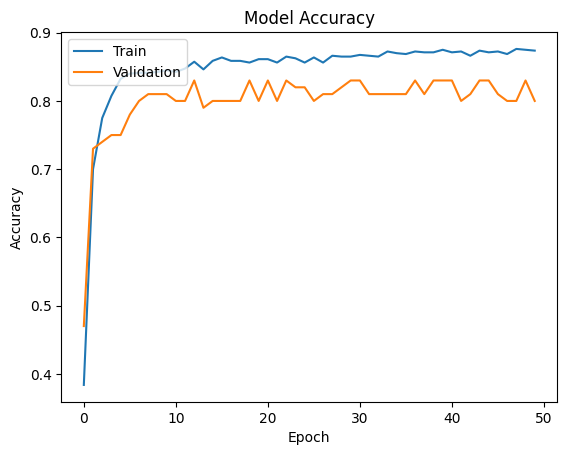

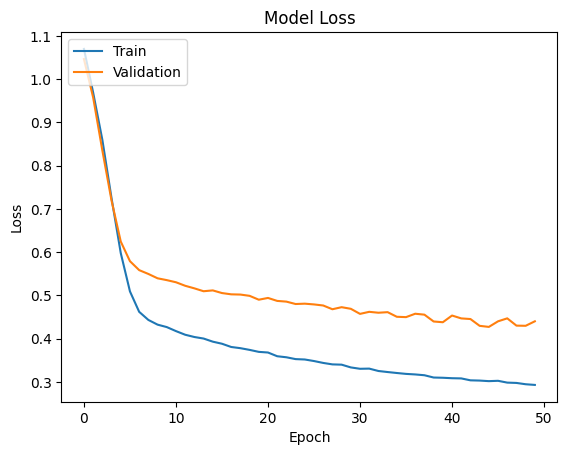

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-1 (Dense)       (None, 64)                512       
                                                                 
 Dense-Layer-2 (Dense)       (None, 64)                4160      
                                                                 
 Dense-Layer-3 (Dense)       (None, 64)                4160      
                                                                 
 Final (Dense)               (None, 3)                 195       
                                                                 
Total params: 9027 (35.26 KB)
Trainable params: 9027 (35.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:



# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

model.summary()



In [179]:
#Pass individual flags to Predict the root cause

import numpy as np

CPU_LOAD=1
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0

prediction=np.argmax(model.predict(
    [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]), axis=1)

print(label_encoder.inverse_transform(prediction))

1/1 [==============================] - 0s 36ms/step
['DATABASE_ISSUE']


In [180]:
#Predicting as a Batch
batch_prediction = np.argmax(model.predict([[1,0,0,0,1,1,0],
                                [0,1,1,1,0,0,0],
                                [1,1,0,1,1,0,1],
                                [0,0,0,0,0,1,0],
                                [1,0,1,0,1,1,1]]), axis =1)

1/1 [==============================] - 0s 20ms/step


In [181]:
print(label_encoder.inverse_transform(batch_prediction))

['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY' 'DATABASE_ISSUE'
 'DATABASE_ISSUE']


# save and load model

In [182]:
model.save('model.h5')
print("model saved")

model saved


/Users/ganeshjadhav/miniconda3/envs/main/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [183]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model.h5')
print("loaded model")

loaded model


In [184]:
model

In [185]:
loaded_model

In [186]:
#predict using loaded model
CPU_LOAD=1
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0

prediction=np.argmax(loaded_model.predict(
    [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]), axis=1)

print(label_encoder.inverse_transform(prediction))

1/1 [==============================] - 0s 33ms/step
['DATABASE_ISSUE']


### save and load lebel encoder

In [187]:
import joblib

joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [188]:
label_encoder_loaded = joblib.load('label_encoder.joblib')


In [189]:
label_encoder.classes_

array(['DATABASE_ISSUE', 'MEMORY', 'NETWORK_DELAY'], dtype=object)

In [190]:
label_encoder_loaded.classes_

array(['DATABASE_ISSUE', 'MEMORY', 'NETWORK_DELAY'], dtype=object)